In [4]:

from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive

In [5]:
oscillator = models.Generic2dOscillator()

oscillator

C:\Users\robot\AppData\Local\Temp\ipykernel_22548\1115098277.py:1: DeprecationWarning: Call to deprecated class PhasePlaneInteractive. (Use tvb-widgets instead)
  ppi_fig = PhasePlaneInteractive(model=oscillator)


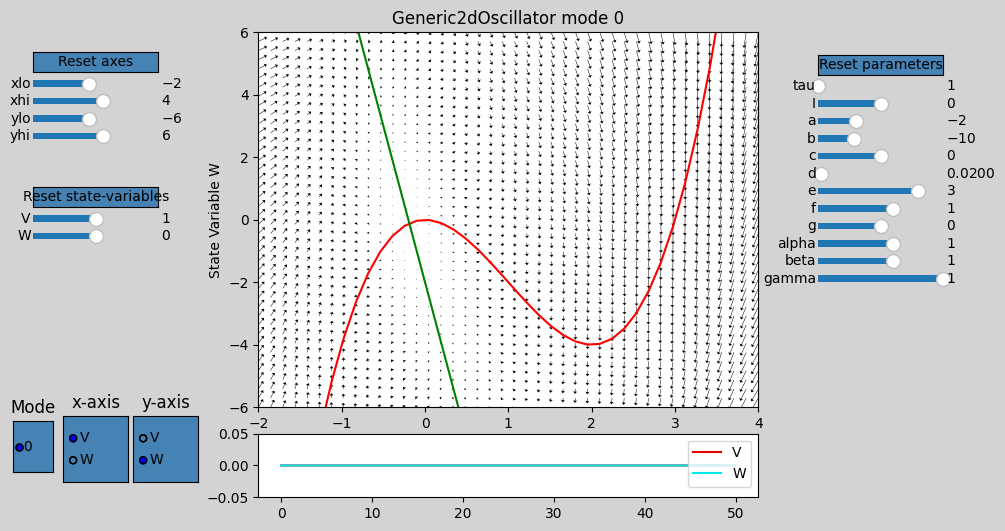

In [6]:
ppi_fig = PhasePlaneInteractive(model=oscillator)
ppi_fig.show()

In [7]:
oscillator

In [8]:
import numpy as np

nsigma = np.array([0.01,])
hiss = noise.Additive(nsig=nsigma)
heunstochint = integrators.HeunStochastic(dt=2**-5, noise=hiss)

# examine integrator's attributes
heunstochint

In [9]:
heunstochint.noise

C:\Users\robot\AppData\Local\Temp\ipykernel_22548\2684875271.py:1: DeprecationWarning: Call to deprecated class PhasePlaneInteractive. (Use tvb-widgets instead)
  ppi_fig = PhasePlaneInteractive(model=oscillator, integrator=heunstochint)


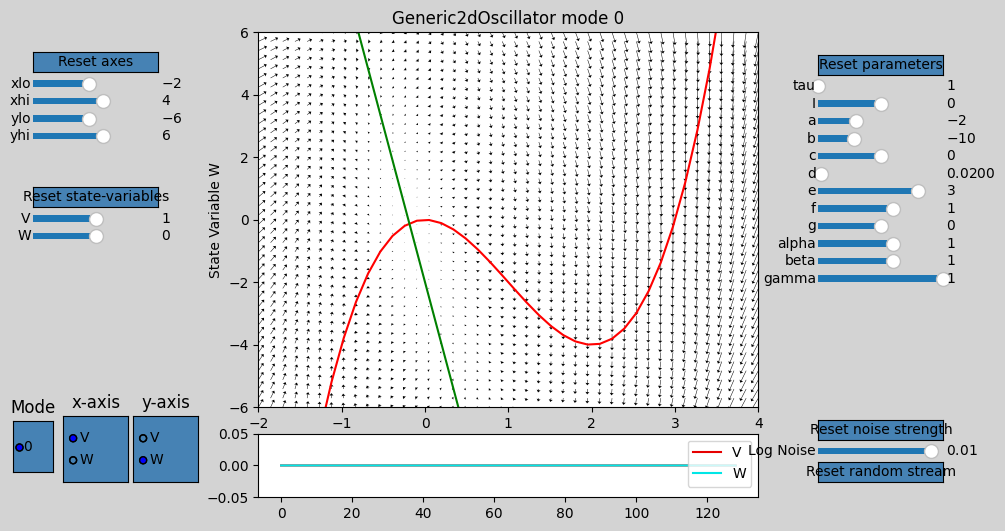

In [10]:
ppi_fig = PhasePlaneInteractive(model=oscillator, integrator=heunstochint)
ppi_fig.show()

In [11]:
heunstochint.noise

In [12]:
conn = connectivity.Connectivity.from_file()
period = 2**-1
sim = simulator.Simulator(
    model = oscillator, 
    connectivity = conn,
    coupling = coupling.Linear(a=np.array([0.0152])), 
    integrator = heunstochint, 
    monitors = (monitors.TemporalAverage(period=period),),
    simulation_length=1e3,
).configure()

# run
(tavg_time, tavg_data), = sim.run()

2024-03-12 16:23:05,540 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [13]:
#Create a TVB TimeSeries object
import tvb.datatypes.time_series
tsr = tvb.datatypes.time_series.TimeSeriesRegion()
tsr.data = tavg_data
tsr.sample_period = period /1000
tsr.sample_period_unit = 's'
tsr.connectivity = conn

from tvb.simulator.plot.timeseries_interactive import TimeSeriesInteractivePlotter
tsi = TimeSeriesInteractivePlotter(time_series=tsr)
tsi.configure()
tsi.show()

C:\Users\robot\AppData\Local\Temp\ipykernel_22548\3661291855.py:10: DeprecationWarning: Call to deprecated class TimeSeriesInteractivePlotter. (Use tvb-widgets instead)
  tsi = TimeSeriesInteractivePlotter(time_series=tsr)


GridBox(children=(Output(layout=Layout(border_bottom='solid 1px black', border_left='solid 1px black', border_…

In [17]:
%pylab nbagg
from tvb.simulator.lab import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\robot\AppData\Local\Temp\ipykernel_22548\3162674548.py:7: DeprecationWarning: Call to deprecated class PhasePlaneInteractive. (Use tvb-widgets instead)
  ppi_fig = PhasePlaneInteractive(model=epileptor)


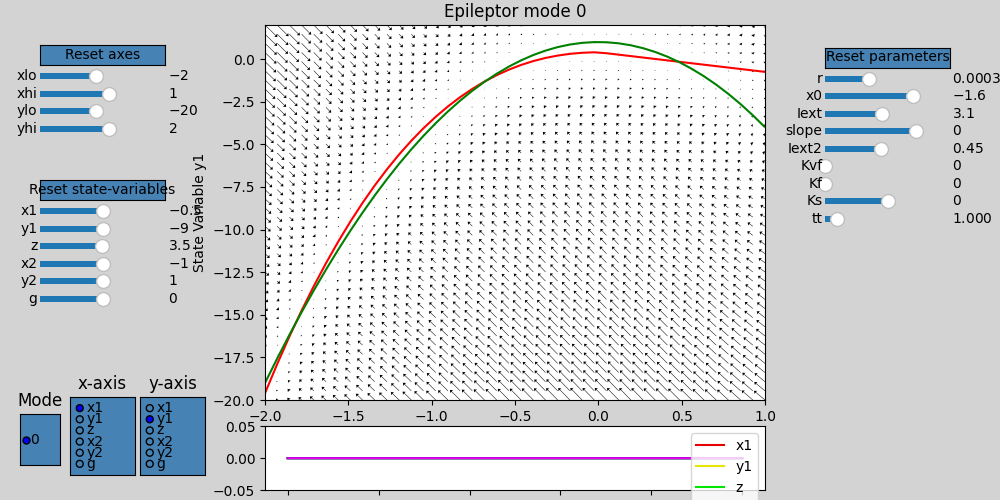

In [18]:
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive

# Create an Epileptor model instance
epileptor = models.Epileptor()

# Open the phase plane tool with the epileptor model
ppi_fig = PhasePlaneInteractive(model=epileptor)
ppi_fig.show()

In [19]:
epileptors = models.Epileptor(Ks=numpy.array([-0.2]), Kf=numpy.array([0.1]), r=numpy.array([0.00015]))
epileptors.x0 = np.ones((76))*-2.4
epileptors.x0[[62, 47, 40]] = np.ones((3))*-1.6
epileptors.x0[[69, 72]] = np.ones((2))*-1.8

In [20]:
con = connectivity.Connectivity.from_file()

2024-03-12 16:47:43,688 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [21]:
coupl = coupling.Difference(a=numpy.array([1.]))

In [22]:
hiss = noise.Additive(nsig = numpy.array([0., 0., 0., 0.0003, 0.0003, 0.]))
heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)

In [36]:
# load the default region mapping
rm = region_mapping.RegionMapping.from_file()
print("This passed")
#Initialise some Monitors with period in physical time
mon_tavg = monitors.TemporalAverage(period=1.)
print("This passed")
mon_EEG = monitors.EEG.from_file()
print("This passed")
mon_EEG.region_mapping=rm
print("This passed")
mon_EEG.period=1. 
print("This passed")
mon_SEEG =monitors.iEEG.from_file()
print("This passed")
mon_SEEG.region_mapping=rm
mon_SEEG.period=1.

#Bundle them
what_to_watch = (mon_tavg, mon_EEG, mon_SEEG)

This passed
This passed
This passed
This passed
This passed
This passed


In [37]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=epileptors, connectivity=con,
                          coupling=coupl, 
                          integrator=heunint, monitors=what_to_watch)

sim.configure()


2024-03-12 17:23:47,072 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-03-12 17:23:48,630 - INFO - tvb.simulator.monitors - Projection configured gain shape (588, 76)


In [38]:
(ttavg, tavg), (teeg, eeg), (tseeg, seeg) = sim.run(simulation_length=10000)

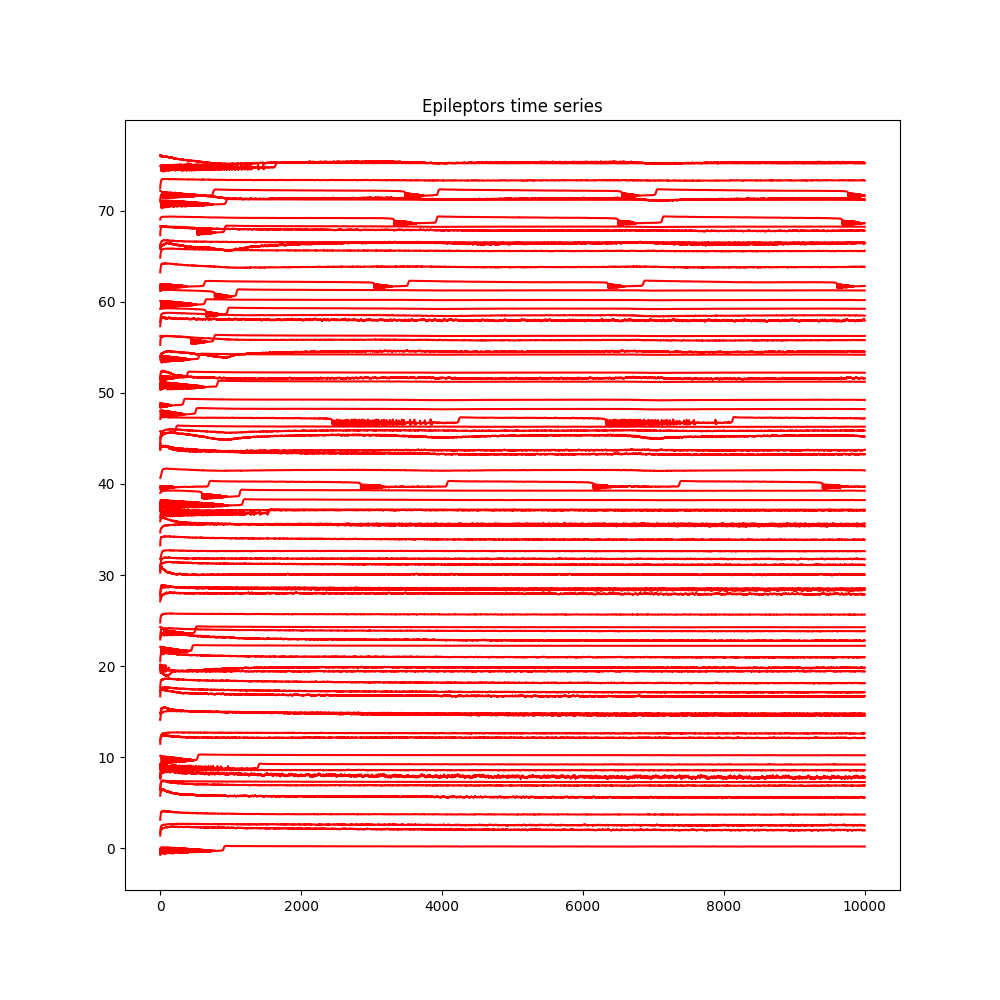

In [39]:
# Normalize the time series to have nice plots
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))
eeg /= (np.max(eeg,0) - np.min(eeg,0 ))
eeg -= np.mean(eeg, 0)
seeg /= (np.max(seeg,0) - np.min(seeg, 0))
seeg -= np.mean(seeg, 0)


#Plot raw time series
figure(figsize=(10,10))
plot(ttavg[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
title("Epileptors time series")
show()

Text(0.5, 1.0, 'EEG')

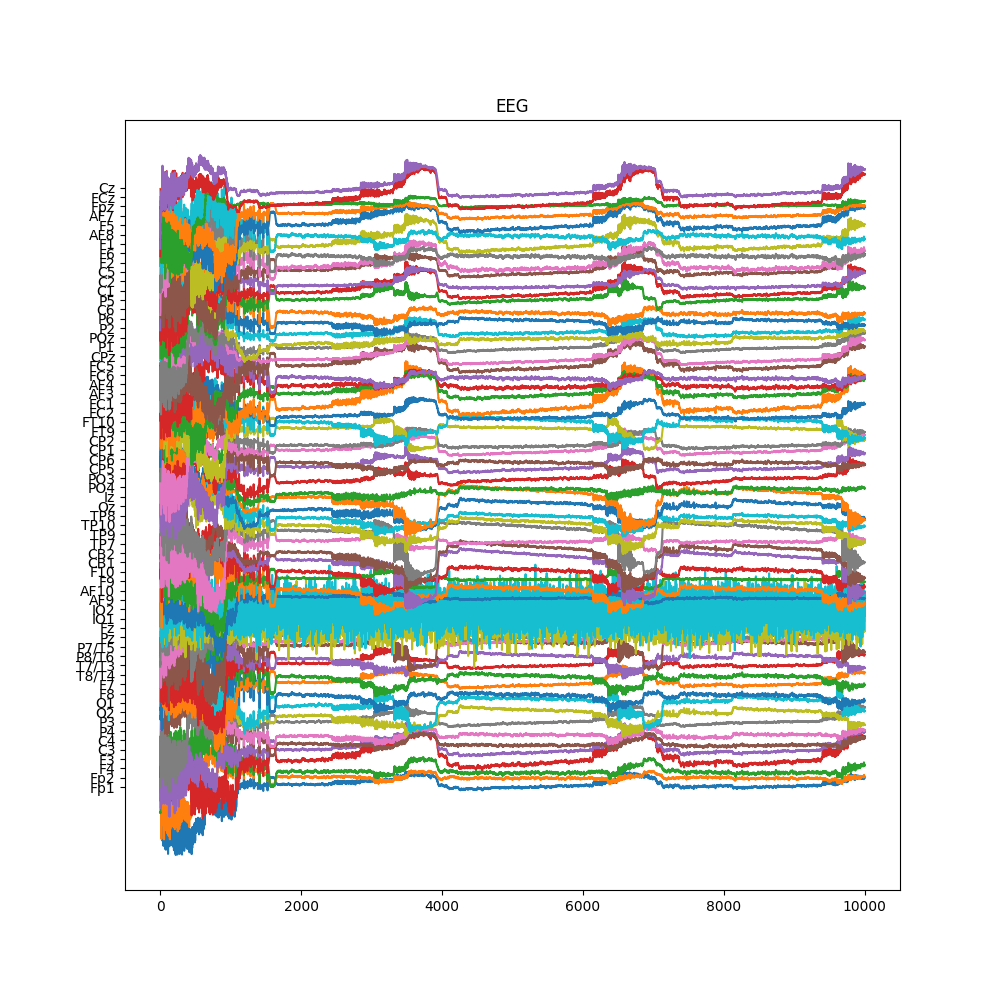

In [41]:
figure(figsize=(10,10))
plot(teeg[:], 10*eeg[:, 0, :, 0] + np.r_[:65])
yticks(np.r_[:65], mon_EEG.sensors.labels)
title("EEG")

ValueError: The number of FixedLocator locations (75), usually from a call to set_ticks, does not match the number of labels (588).

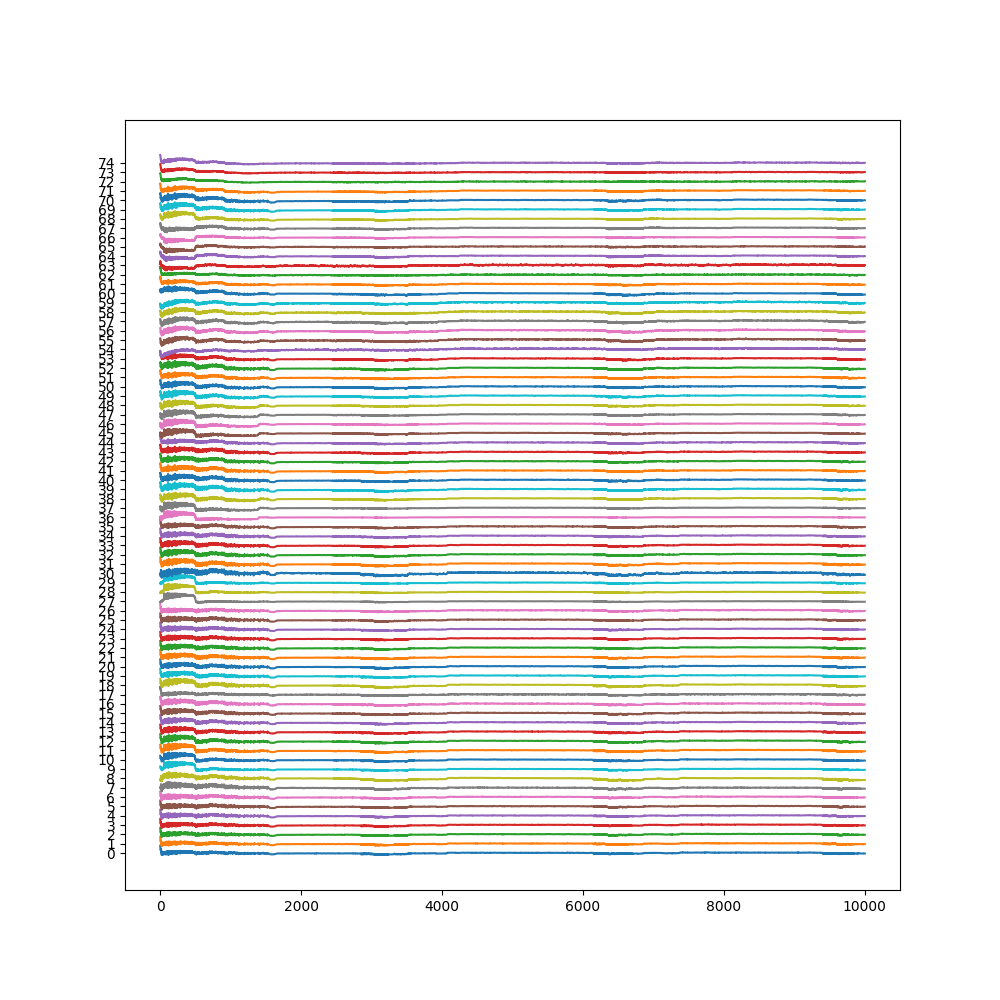

In [42]:
figure(figsize=(10,10))
plot(tseeg[:], seeg[:, 0, :75, 0] + np.r_[:75])
yticks(np.r_[:75], mon_SEEG.sensors.labels)
title("SEEG")

In [43]:
con = connectivity.Connectivity.from_file()
con.weights[[ 47, 40]] = 0.
con.weights[:, [47, 40]] = 0.

2024-03-12 17:33:54,478 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


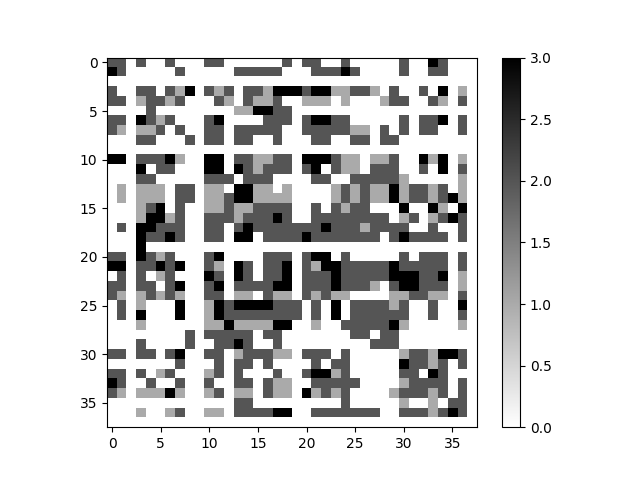

In [44]:
# we plot only the right hemisphere
# the lines and columns set to 0 are clearly visible
figure()
imshow(con.weights[38:, 38:], interpolation='nearest', cmap='binary')
colorbar()
show()

In [45]:
coupl = coupling.Difference(a=numpy.array([1.]))
hiss = noise.Additive(nsig = numpy.array([0., 0., 0., 0.0003, 0.0003, 0.]))
heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)
mon_tavg = monitors.TemporalAverage(period=1.)

In [46]:
epileptors = models.Epileptor(Ks=numpy.array([-0.2]), Kf=numpy.array([0.1]), r=numpy.array([0.00015]))
epileptors.x0 = np.ones((76))*-2.4
epileptors.x0[[69, 72]] = np.ones((2))*-1.8
sim = simulator.Simulator(model=epileptors, connectivity=con,
                          coupling=coupl, 
                          integrator=heunint, monitors=(mon_tavg,))

sim.configure();

In [47]:
(ttavg, tavg), = sim.run(simulation_length=10000)

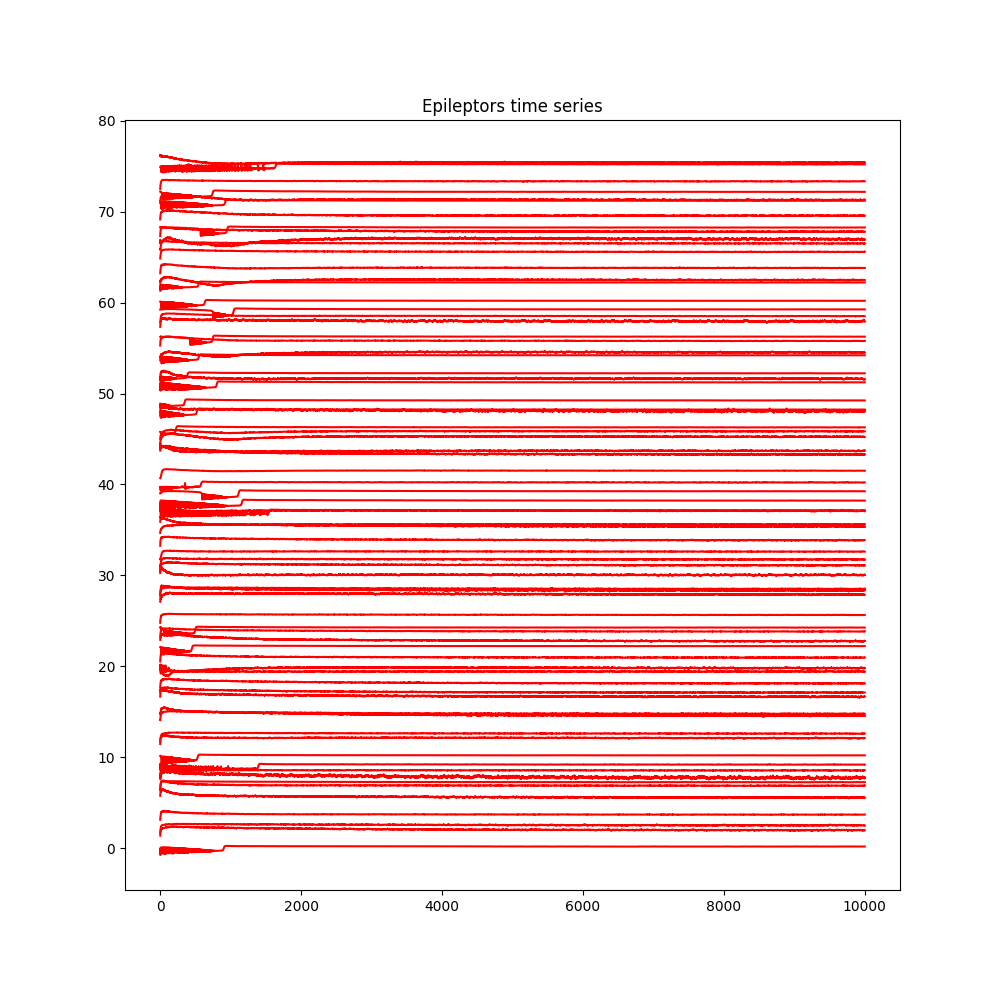

In [48]:
# normalize the time series
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))

figure(figsize=(10,10))
plot(ttavg[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
title("Epileptors time series")
show()

In [49]:
epileptors = models.Epileptor(Ks=numpy.array([-0.2]), Kf=numpy.array([0.1]), r=numpy.array([0.00035]))
epileptors.x0 = np.ones((76))*-2.1
con = connectivity.Connectivity.from_file()
coupl = coupling.Difference(a=numpy.array([0.]))
heunint = integrators.HeunDeterministic(dt=0.05)
mon_tavg = monitors.TemporalAverage(period=1.)

2024-03-12 17:39:43,844 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [50]:
# Weighting for regions to receive stimuli.
weighting = numpy.zeros((76))
weighting[[69, 72]] = numpy.array([2.])

In [51]:
eqn_t = equations.PulseTrain()
eqn_t.parameters["T"] = 10000.0
eqn_t.parameters["onset"] = 2500.0
eqn_t.parameters["tau"] = 50.0
eqn_t.parameters["amp"] = 20.0
stimulus = patterns.StimuliRegion(temporal = eqn_t,
                                  connectivity = con, 
                                  weight = weighting)

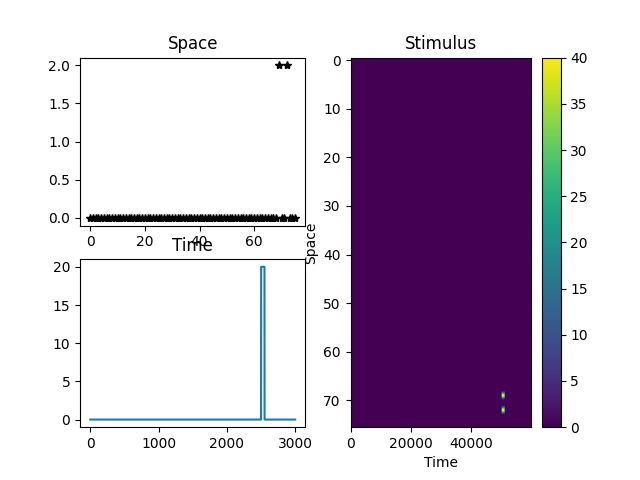

In [52]:
#Configure space and time
stimulus.configure_space()
stimulus.configure_time(numpy.arange(0., 3000., heunint.dt))

#And take a look
plot_pattern(stimulus)
show()


In [53]:
#Bundle them
what_to_watch = (mon_tavg, )
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and stimulus.
sim = simulator.Simulator(model=epileptors, connectivity=con,
                          coupling=coupl, 
                          integrator=heunint, monitors=what_to_watch, 
                          stimulus=stimulus)

sim.configure()


In [54]:
(t, tavg), = sim.run(simulation_length=1000)

2024-03-12 17:45:48,131 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration


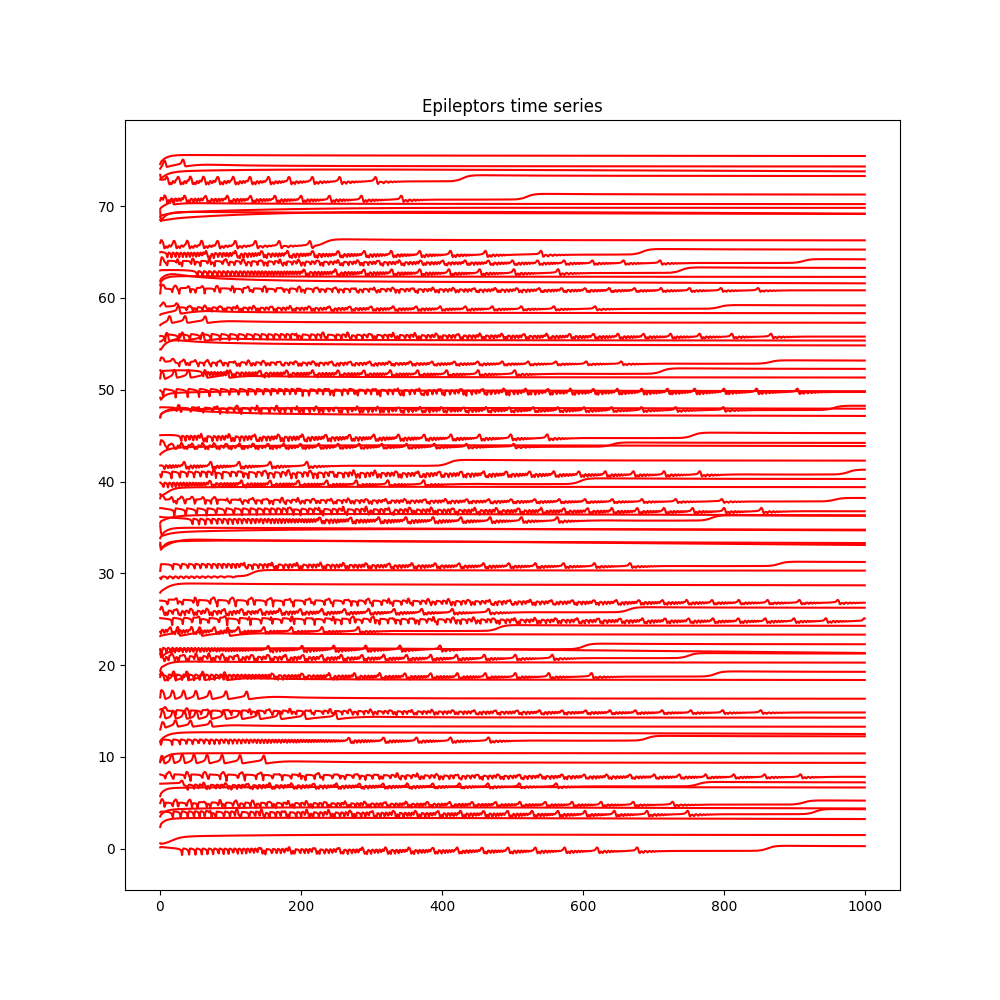

In [55]:
# Normalize the time series to have nice plots
tavg /= (np.max(tavg,0) - np.min(tavg,0 ))

#Plot raw time series
figure(figsize=(10,10))
plot(t[:], tavg[:, 0, :, 0] + np.r_[:76], 'r')
title("Epileptors time series")

#Show them
show()

In [63]:
# Let me do my work based on the above tutorial

from tvb.simulator.lab import *
import numpy as np

# Set up the Epileptor model
epileptor_normal = models.Epileptor(x0=np.ones((76))*-2.4)
epileptor_epileptic = models.Epileptor(x0=np.ones((76))*-1.6)

# Load the connectivity matrix
con = connectivity.Connectivity.from_file()

# Choose a difference coupling function
coupl = coupling.Difference(a=np.array([1.]))

# Set up the integrator and monitors
hiss = noise.Additive(nsig = np.array([0., 0., 0., 0.0003, 0.0003, 0.]))
heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)

# Set up the EEG monitor
rm = region_mapping.RegionMapping.from_file()
mon_EEG = monitors.EEG.from_file()
mon_EEG.region_mapping = rm
period = 1e3/256.0 #Set the sampling frequency to 256 Hz
print(period)
mon_EEG.period =  period

# Initialize the simulator
sim_normal = simulator.Simulator(model=epileptor_normal, connectivity=con, coupling=coupl, integrator=heunint, monitors=[mon_EEG])
sim_epileptic = simulator.Simulator(model=epileptor_epileptic, connectivity=con, coupling=coupl, integrator=heunint, monitors=[mon_EEG])
sim_normal.configure()
sim_epileptic.configure()

# Run the simulation for 1 second (1000 ms)
(_, eeg_normal), = sim_normal.run(simulation_length=1000)
(_, eeg_epileptic), = sim_epileptic.run(simulation_length=1000)

# Extract the EEG data
eeg_normal = eeg_normal[:, 0, :19, 0]  # Extract the first 19 channels
eeg_epileptic = eeg_epileptic[:, 0, :19, 0]  # Extract the first 19 channels

2024-03-12 19:49:02,189 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
3.90625
2024-03-12 19:49:02,279 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-03-12 19:49:02,283 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


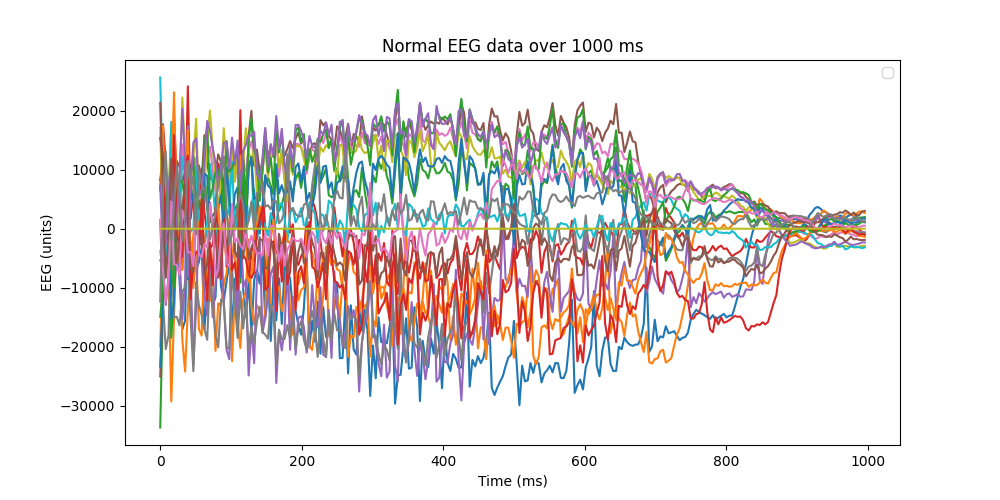

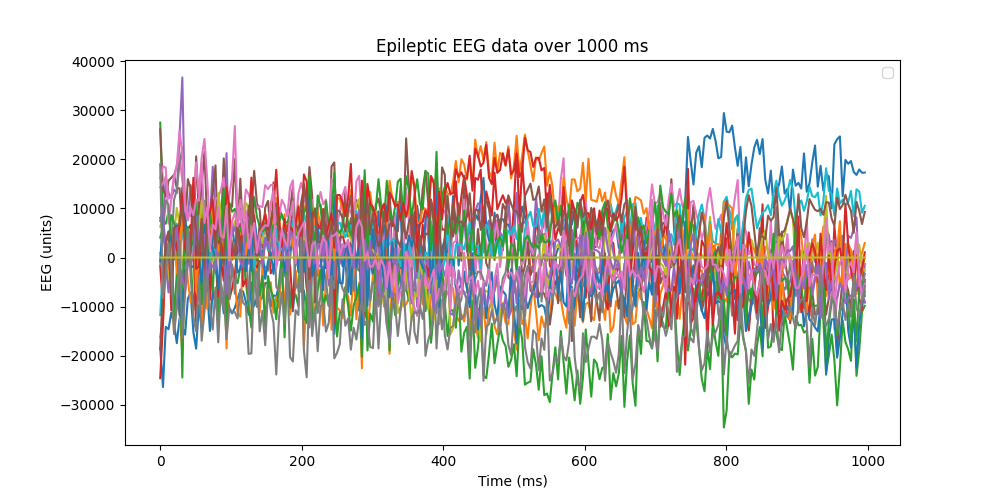

In [72]:
import matplotlib.pyplot as plt

eeg_sensor_labels = mon_EEG.sensors.labels
# Plot the EEG data
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1000, period), eeg_normal)
plt.xlabel('Time (ms)')
plt.ylabel('EEG (units)')

plt.title('Normal EEG data over 1000 ms')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1000, period), eeg_epileptic)
plt.xlabel('Time (ms)')
plt.ylabel('EEG (units)')
plt.title('Epileptic EEG data over 1000 ms')
plt.legend()
plt.show()
plt.close()

2024-03-12 20:19:08,338 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-03-12 20:19:08,435 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-03-12 20:19:08,438 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


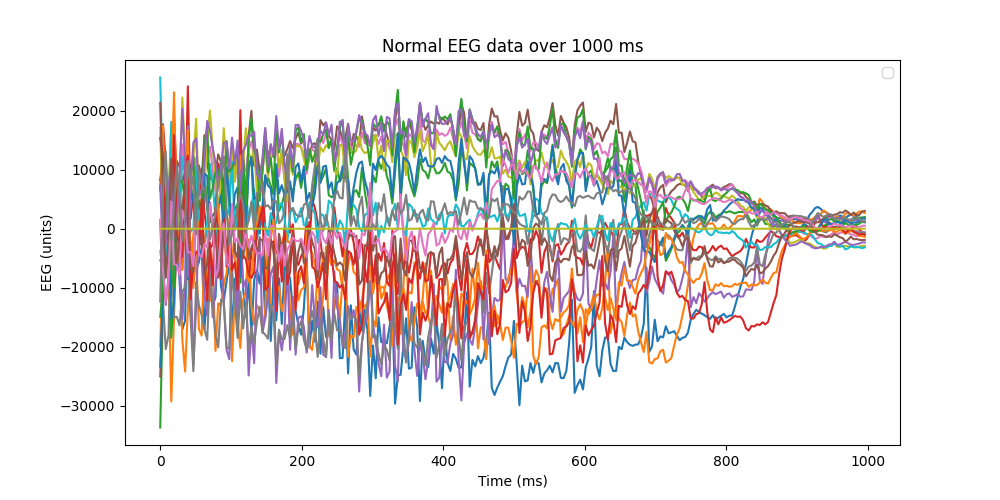

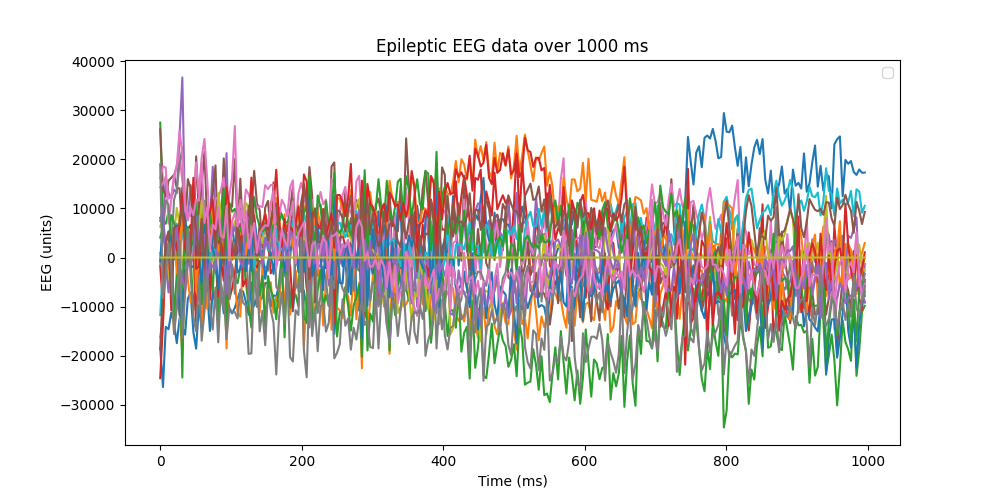

In [73]:
from tvb.simulator.lab import *
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(x0_normal=-2.4, x0_epileptic=-1.6, simulation_length=1000):
    # Set up the Epileptor model
    epileptor_normal = models.Epileptor(x0=np.ones((76))*x0_normal)
    epileptor_epileptic = models.Epileptor(x0=np.ones((76))*x0_epileptic)

    # Load the connectivity matrix
    con = connectivity.Connectivity.from_file()

    # Choose a difference coupling function
    coupl = coupling.Difference(a=np.array([1.]))

    # Set up the integrator and monitors
    hiss = noise.Additive(nsig = np.array([0., 0., 0., 0.0003, 0.0003, 0.]))
    heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)

    # Set up the EEG monitor
    rm = region_mapping.RegionMapping.from_file()
    mon_EEG = monitors.EEG.from_file()
    mon_EEG.region_mapping = rm
    period = 1e3/256.0 #Set the sampling frequency to 256 Hz
    mon_EEG.period =  period

    # Initialize the simulator
    sim_normal = simulator.Simulator(model=epileptor_normal, connectivity=con, coupling=coupl, integrator=heunint, monitors=[mon_EEG])
    sim_epileptic = simulator.Simulator(model=epileptor_epileptic, connectivity=con, coupling=coupl, integrator=heunint, monitors=[mon_EEG])
    sim_normal.configure()
    sim_epileptic.configure()

    # Run the simulation
    (_, eeg_normal), = sim_normal.run(simulation_length=simulation_length)
    (_, eeg_epileptic), = sim_epileptic.run(simulation_length=simulation_length)

    # Extract the EEG data
    eeg_normal = eeg_normal[:, 0, :19, 0]  # Extract the first 19 channels
    eeg_epileptic = eeg_epileptic[:, 0, :19, 0]  # Extract the first 19 channels

    return eeg_normal, eeg_epileptic, mon_EEG, period

def plot_data(eeg_normal, eeg_epileptic, mon_EEG, period):
    eeg_sensor_labels = mon_EEG.sensors.labels
    # Plot the EEG data
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(0, 1000, period), eeg_normal)
    plt.xlabel('Time (ms)')
    plt.ylabel('EEG (units)')
    plt.title('Normal EEG data over 1000 ms')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(0, 1000, period), eeg_epileptic)
    plt.xlabel('Time (ms)')
    plt.ylabel('EEG (units)')
    plt.title('Epileptic EEG data over 1000 ms')
    plt.legend()
    plt.show()
    plt.close()

# Run the simulation and plot the data
eeg_normal, eeg_epileptic, mon_EEG, period = run_simulation()
plot_data(eeg_normal, eeg_epileptic, mon_EEG, period)